# Using PCA For Feature Extraction

## Load the Dataset

In [2]:
# load the data, and it may take a while
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

I had trouble with this cell depending on my version of sklearn

In [3]:
try:
    data=fasion_mnist.data.values
except:
    data=fasion_mnist.data
#data should be numpy array    
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [4]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [5]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [6]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [7]:
[target.min(), target.max()]

[0, 9]

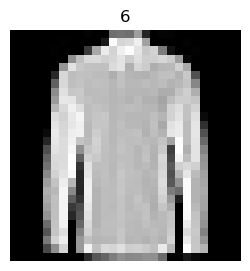

<Figure size 640x480 with 0 Axes>

In [8]:
# show some of the images
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

In [ ]:
from matplotlib import offsetbox
import numpy as np

# Function to plot the image components in 2D
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=100)
transformed_data = ipca.fit_transform(data)

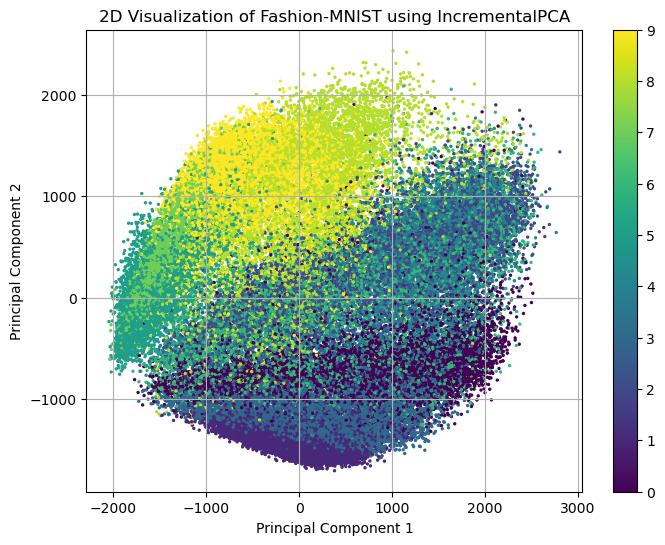

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the 2D projection
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=target, cmap='viridis', s=2)
plt.colorbar()  # Optional: show color bar to indicate different labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Fashion-MNIST using IncrementalPCA')
plt.grid(True)
plt.show()



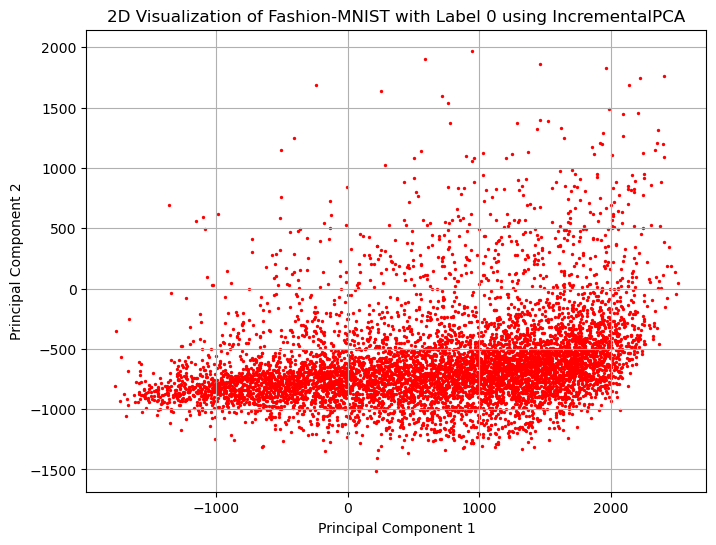

In [ ]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D
label_0 = transformed_data[target == 0]

plt.figure(figsize=(8, 6))
plt.scatter(label_0[:, 0], label_0[:, 1], c='red', s=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Fashion-MNIST with Label 0 using IncrementalPCA')
plt.grid(True)
plt.show()

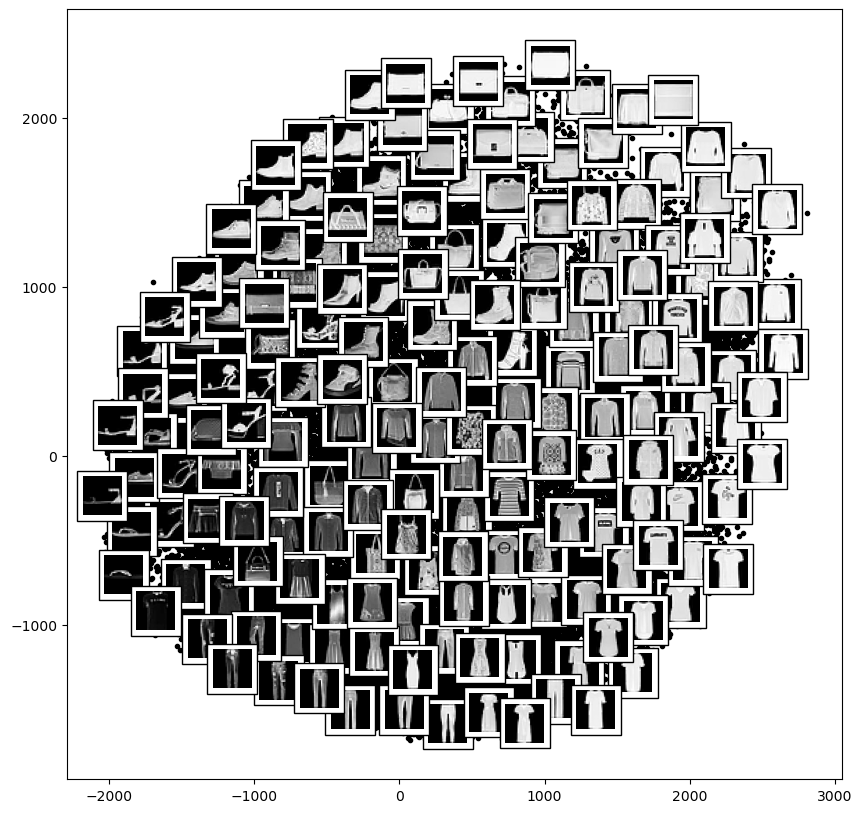

In [ ]:
# use plot_components to show the data points
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(data, ipca, images, ax=ax, thumb_frac=0.05)
plt.show()


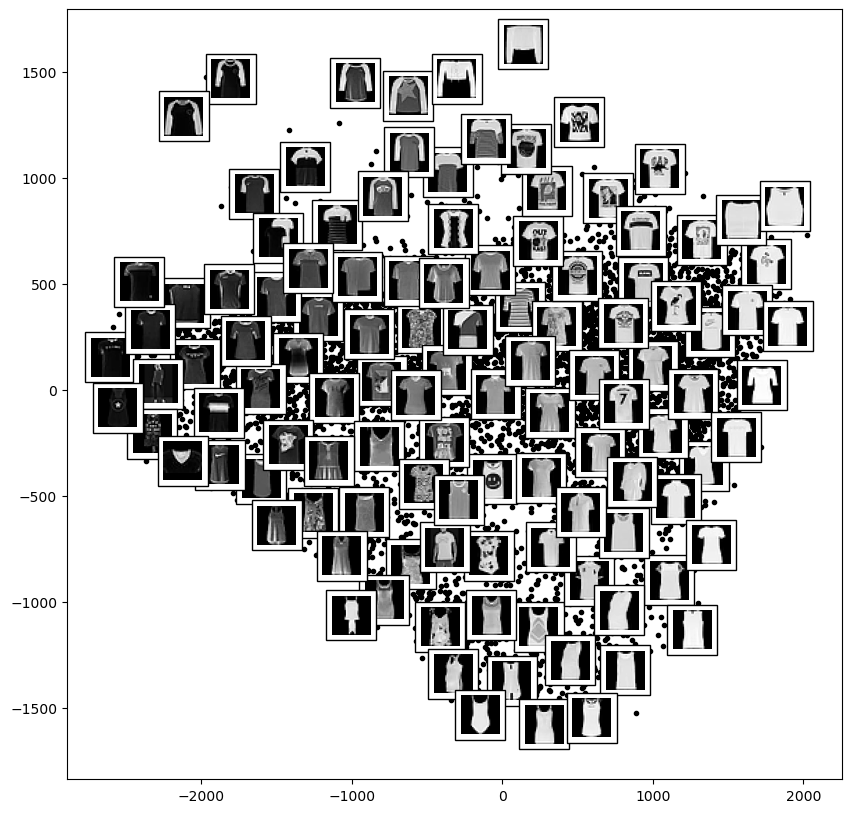

In [ ]:
# show the data points with class label=0
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(data[target==0], ipca, images[target==0], ax=ax, thumb_frac=0.05)
plt.show()


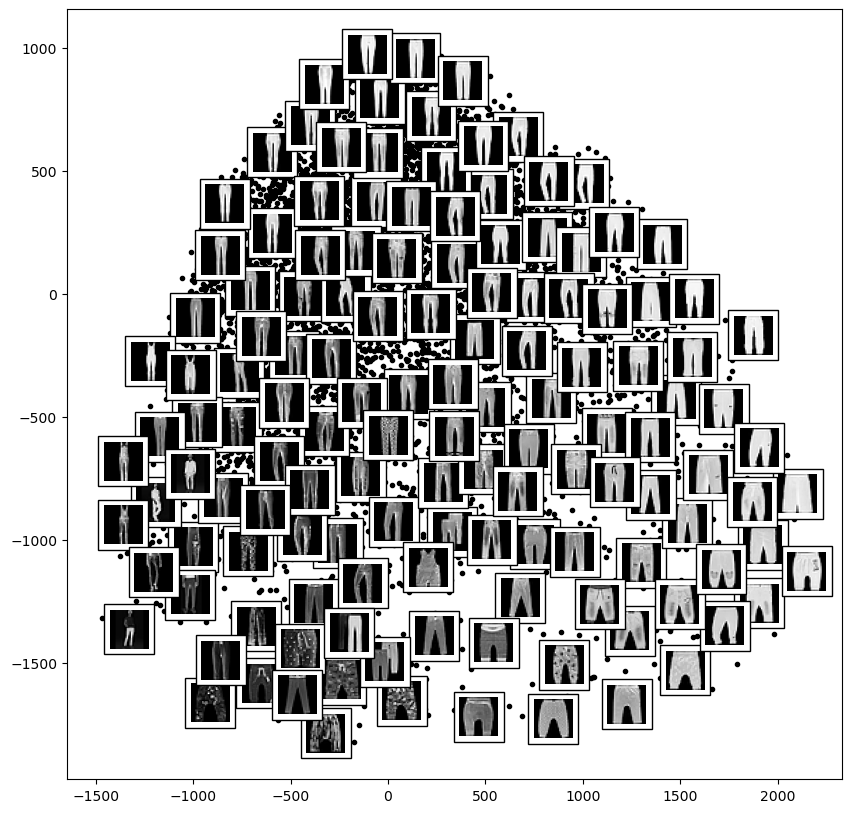

In [ ]:
# show the data points with class label=1
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(data[target==1], ipca, images[target==1], ax=ax, thumb_frac=0.05)
plt.show()


From the above examples, we can see that PCA can extract meaningful features from the images 

# Using PCA to Generate New Images 

First, we need to figure out how many components we need

In [ ]:
n_components = 100
ipca = IncrementalPCA(n_components=n_components, batch_size=100)
transformed_data = ipca.fit_transform(data)


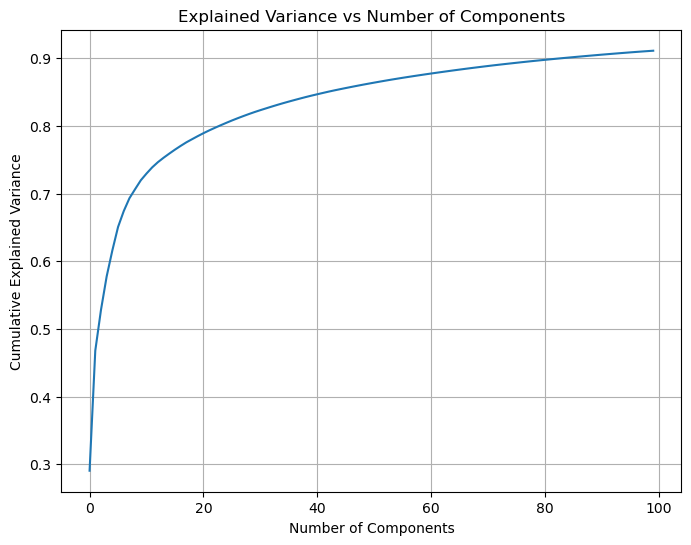

In [ ]:
explained_variance = np.cumsum(ipca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

In [ ]:
# find the smallest value of n_components such that the cumulative explained variance is >= 0.8
n_components = 0
cumulative_explained_variance = 0
while cumulative_explained_variance < 0.8:
    n_components += 1
    cumulative_explained_variance = explained_variance[n_components]

n_components


23

In [33]:
# get the mean, eigenvalues, and eigenvectors from the pca model
mu = ipca.mean_
v = ipca.explained_variance_
w = ipca.components_

print("Mean shape: ", mu.shape, "Eigenvalues shape: ", v.shape, "Eigenvectors shape: ", w.shape)


Mean shape:  (784,) Eigenvalues shape:  (100,) Eigenvectors shape:  (100, 784)


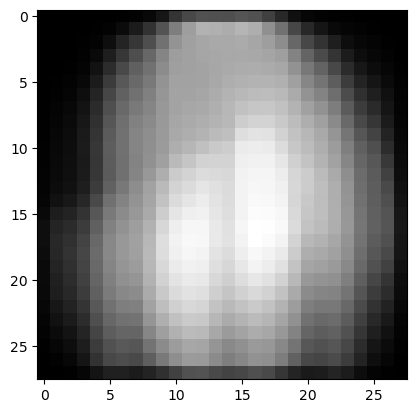

In [ ]:
# plot the mean image from pca
plt.imshow(mu.reshape(28,28), cmap='gray')

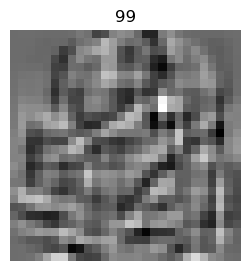

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the first 100 eigenvectors
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 100):
    ax.imshow(w[n].reshape(28,28), cmap='gray')    
    ax.axis('off')
    ax.set_title(n)
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2)


In [24]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

0.9999999999999998

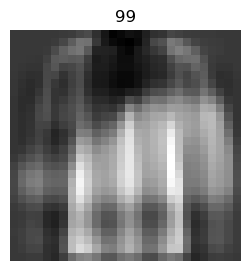

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 100):
    y = 3*np.random.randn(n_components)
    x_new = mu + np.sum([y[k]*np.sqrt(v[k])*w[k] for k in range(n_components)], axis=0)
    ax.imshow(x_new.reshape(28,28), cmap='gray')    
    ax.axis('off')
    ax.set_title(n)
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2)


PCA does not seem to be good at generating images. 


## T-SNE for visualization

In [27]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

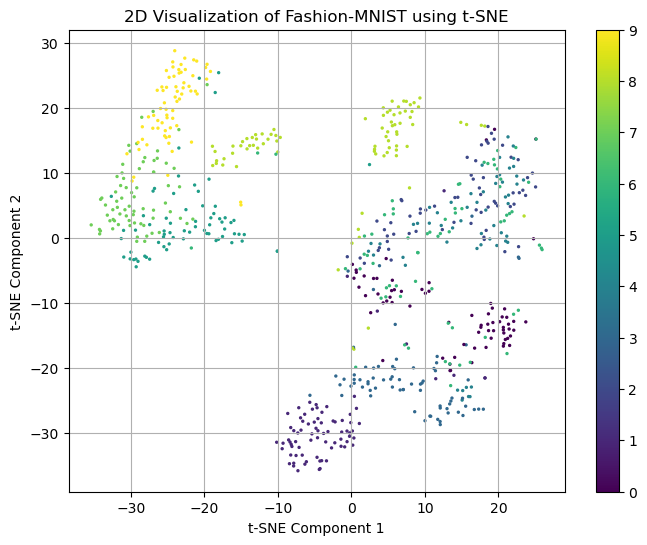

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
transformed_data_s = tsne.fit_transform(data_s)

plt.figure(figsize=(8, 6))
plt.scatter(transformed_data_s[:, 0], transformed_data_s[:, 1], c=target_s, cmap='viridis', s=2)
plt.colorbar()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D Visualization of Fashion-MNIST using t-SNE')
plt.grid(True)
